# Part 1

## CIFAR-10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file=r'/content/drive/MyDrive/DL/cifar-10-python/cifar-10-batches-py/data_batch_1'

In [ ]:
data_batch_1=unpickle(file)

In [ ]:
data_batch_1

{b'batch_label': b'training batch 1 of 5',
 b'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ...,
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 b'filenames': [b'leptodactylus_pentadactylus_s_000004.png',
  b'camion_s_000148.png',
  b'tipper_truck_s_001250.png',
  b'american_elk_s_001521.png',
  b'station_wagon_s_000293.png',
  b'coupe_s_001735.png',
  b'cassowary_s_001300.png',
  b'cow_pony_s_001168.png',
  b'sea_boat_s_001584.png',
  b'tabby_s_001355.png',
  b'muntjac_s_001000.png',
  b'arabian_s_001354.png',
  b'quarter_horse_s_000672.png',
  b'passerine_s_000343.png',
  b'camion_s_001895.png',
  b'trailer_truck_s_000335.png',
  b'dumper_s_000821.png',
  b'alley_cat_s_000200.png',
  b'accentor_s_000677.png',
  b'frog_s_001671.png',
  b'capreolus_capreolus_s_000051.png',
  b'tomcat

In [ ]:
type(data_batch_1)

dict

In [ ]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [ ]:
data_batch_1[b'labels']

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [ ]:
data_batch_1[b'data'].shape

(10000, 3072)

The batch 1 contains 10000 images where each image has size 3072 pixels for the three channels(32x32x3).

In order to visualize the images, they have to be reshaped. First they will be reshaped to 3x1024 for the three color channels. Then they will be reshaped to 3x32x32 since the image size is 32x32. Resultantly there will be a tensor of the dimensions 10000x3x32x32.

(10000, 32, 32, 3)


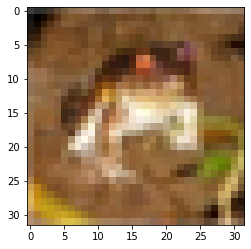

In [ ]:
data=data_batch_1[b'data']
data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)
print(data.shape)
plt.imshow(data[0])

This is the first image of the dataset.

In [ ]:
labels=data_batch_1[b'labels']


In [ ]:
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [ ]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
label_names = load_label_names()
label_counts = dict(zip(*np.unique(labels, return_counts=True)))
for key, value in label_counts.items():
    print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))

Label Counts of [0](AIRPLANE) : 1005
Label Counts of [1](AUTOMOBILE) : 974
Label Counts of [2](BIRD) : 1032
Label Counts of [3](CAT) : 1016
Label Counts of [4](DEER) : 999
Label Counts of [5](DOG) : 937
Label Counts of [6](FROG) : 1030
Label Counts of [7](HORSE) : 1001
Label Counts of [8](SHIP) : 1025
Label Counts of [9](TRUCK) : 981


In [ ]:
from sklearn.model_selection import train_test_split

Splitting the data into train,validation and test.

In [ ]:
data_train, data_test, labels_train, labels_test=train_test_split(data,labels,test_size=0.5,random_state=42)

In [ ]:
data_train.shape

(5000, 32, 32, 3)

In [ ]:
data_val, data_test, labels_val, labels_test=train_test_split(data_test,labels_test,test_size=0.5,random_state=42)

In [ ]:
data_val.shape

(2500, 32, 32, 3)

In [ ]:
data_test.shape

(2500, 32, 32, 3)

Normalizing inputs

In [ ]:
# convert from integers to floats
data_train_norm = data_train.astype('float32')
data_val_norm=data_val.astype('float32')
data_test_norm = data_test.astype('float32')
# normalize to range 0-1
data_train_norm = data_train_norm / 255.0
data_val_norm=data_val_norm/255.0

data_test_norm = data_test_norm / 255.0

One-hot encoding labels so that each neuron in the output layer will be used for each category.

In [ ]:
labels_train = to_categorical(labels_train)
labels_val = to_categorical(labels_val)
labels_test = to_categorical(labels_test)

In [ ]:
labels_train.shape

(5000, 10)

Generating model with 1 Convolution layer and 1 max pooling layer. 

In [ ]:
model = Sequential()

he_normal initializer draws samples from a truncated normal distribution centered on 0 for the weights. 

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

In [ ]:
model.add(MaxPooling2D((2, 2)))

Flattening the outputs for fully connected layer.

In [ ]:
model.add(Flatten())


The output layer has 10 output neurons for the 10 classes. Softmax function has been used to output probability of each class.

In [ ]:
model.add(Dense(10, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [ ]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(data_train_norm, labels_train, epochs=100, batch_size=64, validation_data=(data_val_norm, labels_val))

Epoch 1/100
79/79 [==============================] - 32s 15ms/step - loss: 2.1725 - accuracy: 0.2206 - precision: 0.4771 - recall: 0.0104 - val_loss: 1.9638 - val_accuracy: 0.3072 - val_precision: 0.6389 - val_recall: 0.0184
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 1.9965 - accuracy: 0.2884 - precision: 0.5465 - recall: 0.0364 - val_loss: 2.0007 - val_accuracy: 0.2820 - val_precision: 0.4184 - val_recall: 0.0800
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 1.8874 - accuracy: 0.3288 - precision: 0.5541 - recall: 0.0604 - val_loss: 1.8911 - val_accuracy: 0.3236 - val_precision: 0.6086 - val_recall: 0.0740
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 1.8015 - accuracy: 0.3764 - precision: 0.6629 - recall: 0.0696 - val_loss: 1.8097 - val_accuracy: 0.3632 - val_precision: 0.6911 - val_recall: 0.0528
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 1.7435 - accuracy: 0.4032 - preci

In [ ]:
history

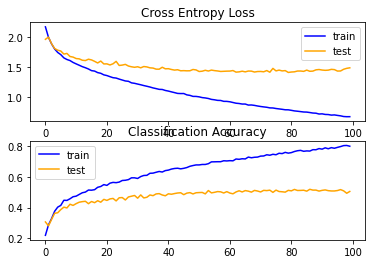

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()

In [ ]:
_, acc,pre,re = model.evaluate(data_test_norm, labels_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 51.560


In [ ]:
print('> %.3f' % (pre * 100.0))

> 61.327


In [ ]:
print('> %.3f' % (re * 100.0))

> 41.040


In [ ]:
predictions=model.predict(data_test_norm)

In [ ]:
predictions

array([[9.6918670e-03, 5.5971631e-04, 1.9921573e-02, ..., 8.4424394e-01,
        4.7075194e-03, 2.0131625e-02],
       [1.4941123e-02, 6.7211336e-01, 1.0826492e-05, ..., 1.7357701e-05,
        4.6318336e-03, 3.0799514e-01],
       [1.7089963e-02, 7.7988207e-04, 6.1259802e-02, ..., 6.8059191e-04,
        3.0780479e-02, 1.2855373e-03],
       ...,
       [1.4931605e-03, 1.2034599e-03, 1.5197501e-01, ..., 4.1696012e-02,
        1.3030831e-04, 9.8614460e-03],
       [5.8675990e-02, 4.9820275e-04, 5.8278427e-02, ..., 9.2396076e-04,
        6.8456884e-03, 8.9608273e-04],
       [5.5247301e-06, 4.3625948e-03, 5.5068587e-05, ..., 3.0578562e-04,
        6.8471374e-05, 9.9412870e-01]], dtype=float32)

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
labels_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In order to convert probabilities into class labels, np.argmax has been used.

In [ ]:
y_test=np.argmax(labels_test, axis=1)

In [ ]:
y_test

array([3, 1, 3, ..., 2, 3, 9])

In [ ]:
y_pred=np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58       251
           1       0.69      0.62      0.65       253
           2       0.44      0.42      0.43       262
           3       0.29      0.56      0.38       254
           4       0.56      0.46      0.51       247
           5       0.42      0.29      0.34       214
           6       0.64      0.46      0.53       255
           7       0.59      0.56      0.57       243
           8       0.64      0.63      0.64       262
           9       0.58      0.51      0.54       259

    accuracy                           0.52      2500
   macro avg       0.54      0.51      0.52      2500
weighted avg       0.54      0.52      0.52      2500



## FASHION MNIST

In [ ]:
from mlxtend.data import loadlocal_mnist

In [ ]:
xtrain,ytrain  = loadlocal_mnist(images_path='/content/drive/MyDrive/DL/Fashion-MNIST/train-images-idx3-ubyte/train-images-idx3-ubyte', 
            labels_path='/content/drive/MyDrive/DL/Fashion-MNIST/train-labels-idx1-ubyte/train-labels-idx1-ubyte')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


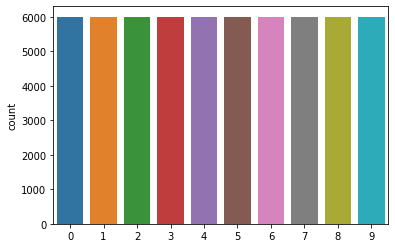

In [ ]:
sns.countplot(ytrain)

All classes have same count.

In [ ]:
xtrain.shape

(60000, 784)

In [ ]:
xtest,ytest  = loadlocal_mnist(images_path='/content/drive/MyDrive/DL/Fashion-MNIST/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte', 
            labels_path='/content/drive/MyDrive/DL/Fashion-MNIST/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

In [ ]:
xtest.shape

(10000, 784)

Reshaping the data so as to produce images of 28x28 and 1 grey channel.

In [ ]:
len(xtrain)

60000

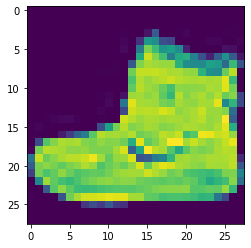

In [ ]:
plt.imshow(xtrain[0].reshape(28,28))#viewing first image of train dataset

In [ ]:
x_train=xtrain.reshape(len(xtrain),28,28,1)
x_test=xtest.reshape(len(xtest),28,28,1)

Creating validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, ytrain, test_size=0.2, random_state=42)

Normalization

In [ ]:
# convert from integers to floats
X_train_norm = X_train.astype('float32')
X_val_norm=X_val.astype('float32')
X_test_norm = x_test.astype('float32')
# normalize to range 0-1
X_train_norm = X_train_norm / 255.0
X_val_norm=X_val_norm/255.0

X_test_norm = X_test_norm / 255.0

One-hot encoding

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
ytest = to_categorical(ytest)

In [ ]:
ytest.shape

(10000, 10)

Generating model with 1 convolution and 1 pooling layer

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))

In [ ]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [ ]:
model.add(Flatten())


The output layer has 10 output neurons for the 10 classes. Softmax function has been used to output probability of each class.

In [ ]:
model.add(Dense(10, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [ ]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train_norm, y_train, epochs=100, batch_size=64, validation_data=(X_val_norm, y_val))

Epoch 1/100
750/750 [==============================] - 36s 8ms/step - loss: 0.6102 - accuracy: 0.7918 - precision_1: 0.8716 - recall_1: 0.6990 - val_loss: 0.4706 - val_accuracy: 0.8418 - val_precision_1: 0.8852 - val_recall_1: 0.7868
Epoch 2/100
750/750 [==============================] - 6s 8ms/step - loss: 0.4473 - accuracy: 0.8451 - precision_1: 0.8877 - recall_1: 0.8007 - val_loss: 0.4361 - val_accuracy: 0.8487 - val_precision_1: 0.8836 - val_recall_1: 0.8091
Epoch 3/100
750/750 [==============================] - 6s 7ms/step - loss: 0.4127 - accuracy: 0.8570 - precision_1: 0.8923 - recall_1: 0.8216 - val_loss: 0.4034 - val_accuracy: 0.8579 - val_precision_1: 0.8920 - val_recall_1: 0.8241
Epoch 4/100
750/750 [==============================] - 6s 8ms/step - loss: 0.3911 - accuracy: 0.8651 - precision_1: 0.8964 - recall_1: 0.8330 - val_loss: 0.3820 - val_accuracy: 0.8668 - val_precision_1: 0.8959 - val_recall_1: 0.8353
Epoch 5/100
750/750 [==============================] - 6s 8ms/step 

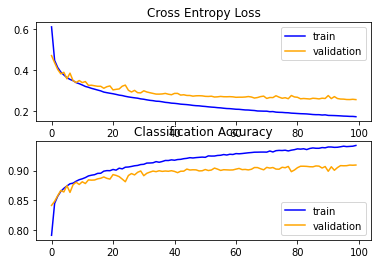

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [ ]:
predictions=model.predict(X_test_norm)

In [ ]:
predictions

array([[7.5271163e-07, 4.6228276e-08, 5.4984052e-06, ..., 8.6309230e-03,
        4.8008552e-04, 9.8269445e-01],
       [4.6703095e-05, 2.2875853e-10, 9.9864918e-01, ..., 1.5717431e-15,
        8.8558160e-08, 5.9654907e-13],
       [4.2241419e-07, 9.9999714e-01, 4.6722355e-09, ..., 1.4999810e-10,
        1.6991054e-09, 4.5924393e-11],
       ...,
       [2.3870014e-03, 6.7808649e-08, 1.8614654e-04, ..., 3.5491755e-06,
        9.8234171e-01, 4.3235415e-09],
       [6.7630481e-08, 9.9998629e-01, 3.7951409e-10, ..., 8.5342794e-10,
        3.9454712e-10, 2.7685592e-08],
       [1.0105753e-04, 8.3856494e-06, 3.5297615e-03, ..., 7.0852295e-02,
        1.5786536e-02, 2.2387647e-03]], dtype=float32)

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
ytest

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In order to convert probabilities into class labels, np.argmax has been used.

In [ ]:
y_test=np.argmax(ytest, axis=1)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred=np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.88      0.90      0.89      1000
           4       0.84      0.84      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.72      0.74      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



The CNN with 1 convolution and 1 pooling layer has performed better on Fashion MNIST dataset as compared to CIFAR-10. One reason could be that CIFAR-10 has three RGB channels whereas the Fashion MNIST dataset only has 1 grey channel.

# PART 2

Uploading fake and real image dataset downloaded from kaggle and visualizing the first image. The images are of the size 600x600.

(600, 600, 3)


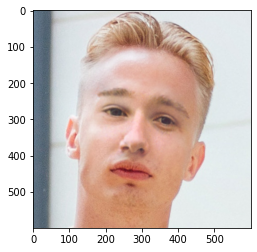

In [5]:
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/MyDrive/DL/fakeimgs/real_and_fake_face"

CATEGORIES = ["training_fake", "training_real"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) 
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        print(img_array.shape)
        plt.imshow(img_array)  
        plt.show() 

        break  
    break  

Fake images will be labelled 0 and real images will be labelled 1.

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=fake 1=real

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img)) 
                img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)#cv2 reads in BRG so converting them to RGB
                training_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

100%|██████████| 540/540 [05:54<00:00,  1.52it/s]

1020


In [7]:
len(training_data)

1020

Data will have to be shuffled

In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
0
1
0
1
1


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, 600, 600, 3))

X = np.array(X).reshape(-1, 600, 600, 3)

[[[[171 166 134]
   [173 168 136]
   [171 166 136]
   ...
   [170 161 128]
   [167 158 125]
   [163 154 121]]

  [[171 166 134]
   [173 168 136]
   [172 167 137]
   ...
   [168 159 126]
   [166 157 124]
   [162 153 120]]

  [[168 163 131]
   [169 164 132]
   [170 165 135]
   ...
   [167 158 125]
   [166 157 124]
   [165 156 123]]

  ...

  [[134 139 109]
   [127 132 102]
   [121 126  96]
   ...
   [113 108  88]
   [114 109  89]
   [118 113  93]]

  [[135 140 110]
   [129 134 104]
   [124 129  99]
   ...
   [113 108  88]
   [114 109  89]
   [120 115  95]]

  [[129 134 104]
   [130 135 105]
   [132 137 107]
   ...
   [113 108  88]
   [111 106  86]
   [119 114  94]]]]


In [11]:
X.shape

(1020, 600, 600, 3)

In [12]:
len(y)

1020

Saving the features and labels for later use.

In [13]:
import pickle

pickle_out = open("/content/drive/MyDrive/DL/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/DL/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Importing saved files.

In [5]:
import pickle

pickle_in = open("/content/drive/MyDrive/DL/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/DL/y.pickle","rb")
y = pickle.load(pickle_in)

Creating train,validation and test sets.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

Normalizing data

In [8]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_val=X_val.astype('float32')
X_test= X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_val=X_val/255.0

X_test = X_test / 255.0

One-hot encoding labels so that each neuron in the output layer will be used for each category.

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [10]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Generating model with 1 convolution and 1 pooling layer

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(600, 600, 3)))

In [13]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [14]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [15]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [16]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 600, 600, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 300, 300, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 2880000)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 5760002   
Total params: 5,760,898
Trainable params: 5,760,898
Non-trainable params: 0
_________________________________________________________________


In [19]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100


ResourceExhaustedError: ignored

Trying 1 channel grey scale images instead of 3 channel images due to lack of memory.

(600, 600)


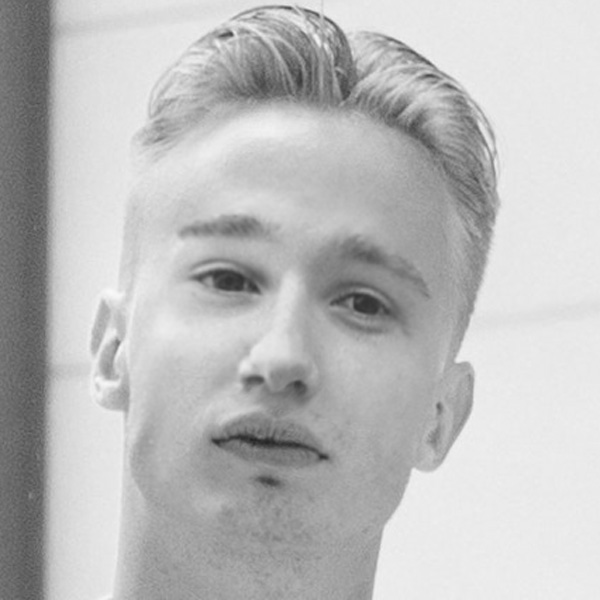

In [7]:
import os
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow
DATADIR = "/content/drive/MyDrive/DL/fakeimgs/real_and_fake_face"

CATEGORIES = ["training_fake", "training_real"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        #img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        print(img_array.shape)
        cv2_imshow(img_array)  
        #plt.show() 

        break  
    break  

Fake images will be labelled 0 and real images will be labelled 1.

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=fake 1=real

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
                #img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)#cv2 reads in BRG so converting them to RGB
                training_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

100%|██████████| 540/540 [02:46<00:00,  3.24it/s]

1020


Data will have to be shuffled

In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
0
1
1
1
1
0
1


In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, 600, 600, 1))

X = np.array(X).reshape(-1, 600, 600, 1)

[[[[136]
   [136]
   [137]
   ...
   [141]
   [141]
   [141]]

  [[138]
   [138]
   [138]
   ...
   [141]
   [141]
   [141]]

  [[139]
   [138]
   [138]
   ...
   [141]
   [141]
   [141]]

  ...

  [[240]
   [239]
   [236]
   ...
   [169]
   [169]
   [168]]

  [[238]
   [239]
   [235]
   ...
   [172]
   [172]
   [172]]

  [[236]
   [237]
   [233]
   ...
   [176]
   [175]
   [175]]]]


In [15]:
X.shape

(1020, 600, 600, 1)

In [16]:
len(y)

1020

Saving the features and labels for later use.

In [17]:
import pickle

pickle_out = open("/content/drive/MyDrive/DL/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/DL/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Importing saved files.

In [5]:
import pickle

pickle_in = open("/content/drive/MyDrive/DL/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/DL/y.pickle","rb")
y = pickle.load(pickle_in)

Creating train,validation and test sets.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

Normalizing data

In [8]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_val=X_val.astype('float32')
X_test= X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_val=X_val/255.0

X_test = X_test / 255.0

One-hot encoding labels so that each neuron in the output layer will be used for each category.

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [10]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

Generating model with 1 convolution and 1 pooling layer

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(600, 600, 1)))

In [13]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [14]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [15]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [16]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 600, 600, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 300, 300, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 2880000)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 5760002   
Total params: 5,760,322
Trainable params: 5,760,322
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100


ResourceExhaustedError: ignored

Repeating operations with resized images

(200, 200)


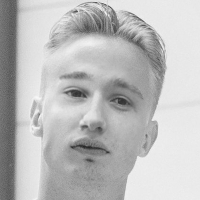

In [21]:
import os
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow
DATADIR = "/content/drive/MyDrive/DL/fakeimgs/real_and_fake_face"

CATEGORIES = ["training_fake", "training_real"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        img_array = cv2.resize(img_array, (200, 200)) 
        #img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        print(img_array.shape)
        cv2_imshow(img_array)  
        #plt.show() 

        break  
    break  

In [22]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=fake 1=real

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
                img_array = cv2.resize(img_array, (200, 200))# resizing images from 600x600 to 200x200 

                #img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)#cv2 reads in BRG so converting them to RGB
                training_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

100%|██████████| 540/540 [02:06<00:00,  4.28it/s]

1020


Data will have to be shuffled

In [23]:
import random

random.shuffle(training_data)

In [24]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
1
0
0
0


In [28]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, 200, 200, 1))

X = np.array(X).reshape(-1, 200, 200, 1)

[[[[236]
   [220]
   [226]
   ...
   [230]
   [227]
   [234]]

  [[229]
   [231]
   [236]
   ...
   [220]
   [226]
   [227]]

  [[220]
   [224]
   [235]
   ...
   [225]
   [231]
   [218]]

  ...

  [[ 45]
   [ 28]
   [ 40]
   ...
   [ 40]
   [ 34]
   [ 44]]

  [[ 53]
   [ 58]
   [ 48]
   ...
   [ 33]
   [ 28]
   [ 30]]

  [[ 53]
   [ 54]
   [ 47]
   ...
   [ 38]
   [ 37]
   [ 39]]]]


In [29]:
X.shape

(1020, 200, 200, 1)

In [30]:
len(y)

1020

Saving the features and labels for later use.

In [31]:
import pickle

pickle_out = open("/content/drive/MyDrive/DL/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/DL/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Importing saved files.

In [5]:
import pickle

pickle_in = open("/content/drive/MyDrive/DL/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/DL/y.pickle","rb")
y = pickle.load(pickle_in)

Creating train,validation and test sets.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

Normalizing data

In [8]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_val=X_val.astype('float32')
X_test= X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_val=X_val/255.0

X_test = X_test / 255.0

One-hot encoding labels so that each neuron in the output layer will be used for each category.

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [10]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Generating model with 1 convolution and 1 pooling layer

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))

In [42]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [43]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [44]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [45]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 640002    
Total params: 640,322
Trainable params: 640,322
Non-trainable params: 0
_________________________________________________________________


In [47]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 4s 205ms/step - loss: 10.4491 - accuracy: 0.4549 - precision_1: 0.4549 - recall_1: 0.4549 - val_loss: 2.8744 - val_accuracy: 0.4784 - val_precision_1: 0.4784 - val_recall_1: 0.4784
Epoch 2/100
8/8 [==============================] - 1s 92ms/step - loss: 15.7706 - accuracy: 0.4627 - precision_1: 0.4627 - recall_1: 0.4627 - val_loss: 7.1583 - val_accuracy: 0.4627 - val_precision_1: 0.4627 - val_recall_1: 0.4627
Epoch 3/100
8/8 [==============================] - 1s 92ms/step - loss: 1.7407 - accuracy: 0.5000 - precision_1: 0.5000 - recall_1: 0.5000 - val_loss: 0.7948 - val_accuracy: 0.5373 - val_precision_1: 0.5373 - val_recall_1: 0.5373
Epoch 4/100
8/8 [==============================] - 1s 92ms/step - loss: 0.6938 - accuracy: 0.5784 - precision_1: 0.5784 - recall_1: 0.5784 - val_loss: 0.6888 - val_accuracy: 0.5294 - val_precision_1: 0.5294 - val_recall_1: 0.5294
Epoch 5/100
8/8 [==============================] - 1s 90ms/step - loss: 0.648

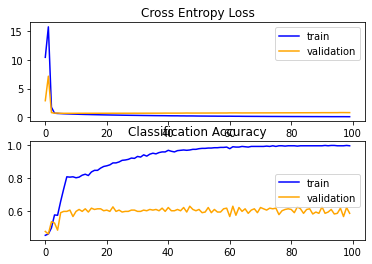

In [48]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

Results clearly show the model has overfit the training data.

In [49]:
predictions=model.predict(X_test)

In [50]:
predictions

array([[0.96623415, 0.03376592],
       [0.8169704 , 0.18302956],
       [0.03102235, 0.96897763],
       [0.82932866, 0.17067128],
       [0.62532   , 0.37467998],
       [0.21026643, 0.7897335 ],
       [0.61278456, 0.38721544],
       [0.9207242 , 0.07927581],
       [0.32210228, 0.6778977 ],
       [0.6410368 , 0.35896313],
       [0.92677957, 0.07322045],
       [0.82339936, 0.1766007 ],
       [0.57411224, 0.4258878 ],
       [0.9743541 , 0.02564591],
       [0.10775574, 0.89224434],
       [0.45171246, 0.5482875 ],
       [0.9353842 , 0.06461579],
       [0.30323917, 0.6967609 ],
       [0.2983228 , 0.70167714],
       [0.11967949, 0.88032055],
       [0.37731716, 0.62268287],
       [0.35066447, 0.64933556],
       [0.5239228 , 0.4760772 ],
       [0.02155071, 0.9784493 ],
       [0.34192643, 0.6580736 ],
       [0.47387698, 0.52612305],
       [0.7840385 , 0.21596155],
       [0.2959653 , 0.7040347 ],
       [0.35163665, 0.64836335],
       [0.20888716, 0.79111284],
       [0.

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [51]:
from sklearn.metrics import classification_report


In [58]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [59]:
y_test=np.argmax(y_test, axis=1)

In [60]:
y_test

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [104]:
y_pred=np.argmax(predictions, axis=1)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       118
           1       0.68      0.66      0.67       137

    accuracy                           0.65       255
   macro avg       0.65      0.65      0.65       255
weighted avg       0.65      0.65      0.65       255



### Increasing to 2 C+P layers

In [86]:
model = Sequential()

In [87]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))

In [88]:
model.add(MaxPooling2D((2, 2)))

In [89]:
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

In [90]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [91]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [92]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [93]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 320002    
Total params: 338,818
Trainable params: 338,818
Non-trainable params: 0
________________________________________________

In [95]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 4s 355ms/step - loss: 13.6349 - accuracy: 0.5039 - precision_3: 0.5039 - recall_3: 0.5039 - val_loss: 0.8303 - val_accuracy: 0.4627 - val_precision_3: 0.4627 - val_recall_3: 0.4627
Epoch 2/100
8/8 [==============================] - 1s 147ms/step - loss: 0.7278 - accuracy: 0.5020 - precision_3: 0.5020 - recall_3: 0.5020 - val_loss: 0.6954 - val_accuracy: 0.5373 - val_precision_3: 0.5373 - val_recall_3: 0.5373
Epoch 3/100
8/8 [==============================] - 1s 147ms/step - loss: 0.6862 - accuracy: 0.5588 - precision_3: 0.5588 - recall_3: 0.5588 - val_loss: 0.6919 - val_accuracy: 0.5255 - val_precision_3: 0.5255 - val_recall_3: 0.5255
Epoch 4/100
8/8 [==============================] - 1s 164ms/step - loss: 0.6648 - accuracy: 0.6510 - precision_3: 0.6510 - recall_3: 0.6510 - val_loss: 0.6814 - val_accuracy: 0.5882 - val_precision_3: 0.5882 - val_recall_3: 0.5882
Epoch 5/100
8/8 [==============================] - 1s 146ms/step - loss: 0.

Results clearly show the model has overfit the training data.

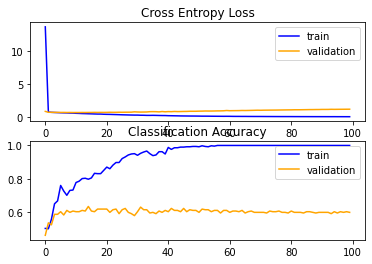

In [96]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [97]:
predictions=model.predict(X_test)

In [98]:
predictions

array([[9.83661950e-01, 1.63380746e-02],
       [9.54906285e-01, 4.50936966e-02],
       [1.30355533e-03, 9.98696506e-01],
       [9.65342164e-01, 3.46578062e-02],
       [9.60000455e-01, 3.99995036e-02],
       [1.45534262e-01, 8.54465723e-01],
       [3.66157033e-02, 9.63384271e-01],
       [9.95800316e-01, 4.19973070e-03],
       [7.65143871e-01, 2.34856173e-01],
       [9.84964073e-01, 1.50359403e-02],
       [9.94031131e-01, 5.96884964e-03],
       [9.93752778e-01, 6.24722382e-03],
       [9.86270130e-01, 1.37298666e-02],
       [9.92218137e-01, 7.78183201e-03],
       [1.03797042e-03, 9.98962045e-01],
       [8.83066475e-01, 1.16933480e-01],
       [9.99266922e-01, 7.33017223e-04],
       [6.09290041e-02, 9.39071059e-01],
       [5.29511971e-03, 9.94704902e-01],
       [4.03921492e-02, 9.59607899e-01],
       [1.94032565e-01, 8.05967391e-01],
       [3.03459615e-01, 6.96540415e-01],
       [3.93763244e-01, 6.06236756e-01],
       [7.54947355e-03, 9.92450535e-01],
       [3.123742

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [99]:
from sklearn.metrics import classification_report


In [100]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [101]:
ytest=np.argmax(y_test, axis=1)

In [102]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [106]:
y_pred=np.argmax(predictions, axis=1)

In [107]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       118
           1       0.65      0.66      0.66       137

    accuracy                           0.63       255
   macro avg       0.63      0.63      0.63       255
weighted avg       0.63      0.63      0.63       255



NO improvement in results after increase from 1 to 2 C+P layers

### Adding drop out layer after fully connected with 1 C+P layer

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))

In [13]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [14]:
model.add(Flatten())


Adding drop out after fully connected

In [16]:
from keras.layers import Dropout
model.add(Dropout(0.2))

The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [17]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [18]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dropout (Dropout)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 640002    
Total params: 640,322
Trainable params: 640,322
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 32s 217ms/step - loss: 14.1932 - accuracy: 0.5235 - precision: 0.5235 - recall: 0.5235 - val_loss: 16.0873 - val_accuracy: 0.4627 - val_precision: 0.4627 - val_recall: 0.4627
Epoch 2/100
8/8 [==============================] - 1s 96ms/step - loss: 12.4640 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.5000 - val_loss: 8.3802 - val_accuracy: 0.5804 - val_precision: 0.5804 - val_recall: 0.5804
Epoch 3/100
8/8 [==============================] - 1s 97ms/step - loss: 6.1991 - accuracy: 0.5275 - precision: 0.5275 - recall: 0.5275 - val_loss: 2.0800 - val_accuracy: 0.4745 - val_precision: 0.4745 - val_recall: 0.4745
Epoch 4/100
8/8 [==============================] - 1s 94ms/step - loss: 0.9156 - accuracy: 0.5784 - precision: 0.5784 - recall: 0.5784 - val_loss: 0.6882 - val_accuracy: 0.5451 - val_precision: 0.5451 - val_recall: 0.5451
Epoch 5/100
8/8 [==============================] - 1s 92ms/step - loss: 0.6283 - accuracy: 0.6059 - precisi

Results clearly show the model has overfit the training data.

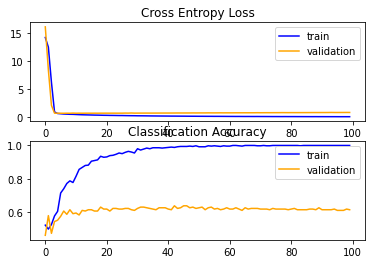

In [21]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [22]:
predictions=model.predict(X_test)

In [23]:
predictions

array([[0.9648301 , 0.03516992],
       [0.58778876, 0.41221124],
       [0.05163331, 0.9483667 ],
       [0.9233694 , 0.07663056],
       [0.5461763 , 0.4538237 ],
       [0.09834629, 0.90165365],
       [0.24864994, 0.7513501 ],
       [0.97349066, 0.02650934],
       [0.4061004 , 0.5938996 ],
       [0.67404073, 0.32595924],
       [0.84491783, 0.15508212],
       [0.8811823 , 0.11881772],
       [0.5385735 , 0.46142647],
       [0.9873374 , 0.01266264],
       [0.05253378, 0.9474662 ],
       [0.7443996 , 0.25560042],
       [0.92422163, 0.07577839],
       [0.17694606, 0.82305396],
       [0.10184291, 0.8981571 ],
       [0.08720185, 0.91279817],
       [0.2998546 , 0.7001454 ],
       [0.37063554, 0.6293645 ],
       [0.66655725, 0.3334428 ],
       [0.00759951, 0.9924005 ],
       [0.22279204, 0.7772079 ],
       [0.6445014 , 0.35549867],
       [0.85753036, 0.14246961],
       [0.25103828, 0.74896175],
       [0.2290244 , 0.77097565],
       [0.2703605 , 0.72963953],
       [0.

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [24]:
from sklearn.metrics import classification_report


In [25]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [26]:
ytest=np.argmax(y_test, axis=1)

In [27]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [28]:
y_pred=np.argmax(predictions, axis=1)

In [29]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       118
           1       0.64      0.62      0.63       137

    accuracy                           0.61       255
   macro avg       0.61      0.61      0.61       255
weighted avg       0.61      0.61      0.61       255



No improvement in results as a result of adding drop out layer.

### Adding batch normalization after convolution layer

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))

In [36]:
from keras.layers import BatchNormalization
model.add(BatchNormalization())

In [37]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [38]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [39]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [40]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 640002    
Total params: 640,450
Trainable params: 640,386
Non-trainable params: 64
_________________________________________________________________


In [42]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 2s 182ms/step - loss: 14.4366 - accuracy: 0.5216 - precision_1: 0.5216 - recall_1: 0.5216 - val_loss: 10.3318 - val_accuracy: 0.4667 - val_precision_1: 0.4667 - val_recall_1: 0.4667
Epoch 2/100
8/8 [==============================] - 1s 112ms/step - loss: 5.3898 - accuracy: 0.7255 - precision_1: 0.7255 - recall_1: 0.7255 - val_loss: 5.2933 - val_accuracy: 0.5451 - val_precision_1: 0.5451 - val_recall_1: 0.5451
Epoch 3/100
8/8 [==============================] - 1s 112ms/step - loss: 3.0718 - accuracy: 0.7843 - precision_1: 0.7843 - recall_1: 0.7843 - val_loss: 8.2103 - val_accuracy: 0.4667 - val_precision_1: 0.4667 - val_recall_1: 0.4667
Epoch 4/100
8/8 [==============================] - 1s 109ms/step - loss: 1.8578 - accuracy: 0.8392 - precision_1: 0.8392 - recall_1: 0.8392 - val_loss: 7.7999 - val_accuracy: 0.5059 - val_precision_1: 0.5059 - val_recall_1: 0.5059
Epoch 5/100
8/8 [==============================] - 1s 111ms/step - loss: 0

Results clearly show the model has overfit the training data.

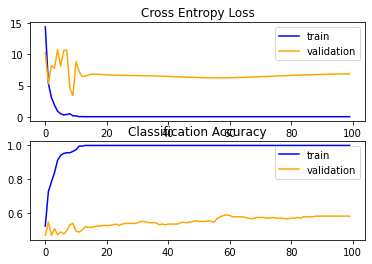

In [43]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [44]:
predictions=model.predict(X_test)

In [45]:
predictions

array([[1.00000000e+00, 2.62171876e-13],
       [3.95790255e-03, 9.96042132e-01],
       [1.72742807e-17, 1.00000000e+00],
       [9.99999523e-01, 5.14675548e-07],
       [9.99233603e-01, 7.66404206e-04],
       [1.01113048e-10, 1.00000000e+00],
       [5.80370193e-04, 9.99419689e-01],
       [1.00000000e+00, 2.19623764e-10],
       [9.99987841e-01, 1.21504245e-05],
       [1.00000000e+00, 1.30092133e-08],
       [1.00000000e+00, 4.97209565e-12],
       [2.63194889e-02, 9.73680496e-01],
       [1.00000000e+00, 2.51224680e-10],
       [1.00000000e+00, 2.04429437e-13],
       [1.23470669e-17, 1.00000000e+00],
       [5.23564586e-06, 9.99994755e-01],
       [1.00000000e+00, 2.63721517e-21],
       [2.75386553e-20, 1.00000000e+00],
       [9.98718381e-01, 1.28162582e-03],
       [1.94686402e-11, 1.00000000e+00],
       [4.90329876e-06, 9.99995112e-01],
       [7.94810185e-05, 9.99920487e-01],
       [9.76061583e-01, 2.39383914e-02],
       [3.62839426e-18, 1.00000000e+00],
       [9.094979

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [46]:
from sklearn.metrics import classification_report


In [47]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [48]:
ytest=np.argmax(y_test, axis=1)

In [49]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [50]:
y_pred=np.argmax(predictions, axis=1)

In [51]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.62      0.60       118
           1       0.65      0.61      0.63       137

    accuracy                           0.61       255
   macro avg       0.61      0.61      0.61       255
weighted avg       0.61      0.61      0.61       255



No improvement in results as a result of adding batch normalization layer.

### Changing padding to valid

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 1)))

In [54]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [55]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [56]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [57]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 313632)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 627266    
Total params: 627,586
Trainable params: 627,586
Non-trainable params: 0
_________________________________________________________________


In [59]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 2s 193ms/step - loss: 37.1631 - accuracy: 0.4706 - precision_2: 0.4706 - recall_2: 0.4706 - val_loss: 55.1190 - val_accuracy: 0.5373 - val_precision_2: 0.5373 - val_recall_2: 0.5373
Epoch 2/100
8/8 [==============================] - 1s 88ms/step - loss: 22.5819 - accuracy: 0.4824 - precision_2: 0.4824 - recall_2: 0.4824 - val_loss: 0.7142 - val_accuracy: 0.5490 - val_precision_2: 0.5490 - val_recall_2: 0.5490
Epoch 3/100
8/8 [==============================] - 1s 85ms/step - loss: 0.7255 - accuracy: 0.5275 - precision_2: 0.5275 - recall_2: 0.5275 - val_loss: 0.7460 - val_accuracy: 0.5373 - val_precision_2: 0.5373 - val_recall_2: 0.5373
Epoch 4/100
8/8 [==============================] - 1s 86ms/step - loss: 0.6445 - accuracy: 0.5824 - precision_2: 0.5824 - recall_2: 0.5824 - val_loss: 0.6752 - val_accuracy: 0.5647 - val_precision_2: 0.5647 - val_recall_2: 0.5647
Epoch 5/100
8/8 [==============================] - 1s 85ms/step - loss: 0.59

Results clearly show the model has overfit the training data.

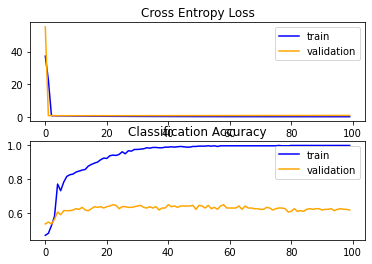

In [60]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [61]:
predictions=model.predict(X_test)

In [62]:
predictions

array([[0.963745  , 0.03625503],
       [0.85137004, 0.14862998],
       [0.11324696, 0.886753  ],
       [0.9320225 , 0.06797746],
       [0.70432085, 0.29567912],
       [0.31750023, 0.68249977],
       [0.3039146 , 0.69608533],
       [0.9145883 , 0.08541171],
       [0.35028526, 0.64971477],
       [0.65925646, 0.34074354],
       [0.93768585, 0.06231412],
       [0.70731   , 0.29268992],
       [0.5793158 , 0.42068422],
       [0.86863655, 0.1313635 ],
       [0.13393426, 0.86606574],
       [0.35807356, 0.64192647],
       [0.96438897, 0.03561112],
       [0.08146595, 0.9185341 ],
       [0.05940035, 0.9405996 ],
       [0.11840769, 0.8815923 ],
       [0.20427462, 0.79572535],
       [0.28560638, 0.7143936 ],
       [0.53598624, 0.46401373],
       [0.00940003, 0.9906    ],
       [0.2648834 , 0.7351166 ],
       [0.71744853, 0.2825514 ],
       [0.9269125 , 0.07308757],
       [0.10630196, 0.89369804],
       [0.4807881 , 0.5192119 ],
       [0.17616847, 0.8238315 ],
       [0.

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [63]:
from sklearn.metrics import classification_report


In [64]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [65]:
ytest=np.argmax(y_test, axis=1)

In [66]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [67]:
y_pred=np.argmax(predictions, axis=1)

In [68]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       118
           1       0.67      0.70      0.68       137

    accuracy                           0.65       255
   macro avg       0.65      0.65      0.65       255
weighted avg       0.65      0.65      0.65       255



Slight imporvement in results particularly the recall of positive(real) class when valid padding has been used.

### Increasing number of filters

In [11]:
model = Sequential()

Increasing number of filters from 32 to 64

In [12]:
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 1)))

In [13]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [14]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [15]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [16]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 627264)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1254530   
Total params: 1,255,170
Trainable params: 1,255,170
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 33s 306ms/step - loss: 31.1211 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.5000 - val_loss: 16.0770 - val_accuracy: 0.4588 - val_precision: 0.4588 - val_recall: 0.4588
Epoch 2/100
8/8 [==============================] - 1s 159ms/step - loss: 11.7285 - accuracy: 0.5784 - precision: 0.5784 - recall: 0.5784 - val_loss: 16.1382 - val_accuracy: 0.4706 - val_precision: 0.4706 - val_recall: 0.4706
Epoch 3/100
8/8 [==============================] - 1s 170ms/step - loss: 10.0336 - accuracy: 0.5902 - precision: 0.5902 - recall: 0.5902 - val_loss: 4.7755 - val_accuracy: 0.5961 - val_precision: 0.5961 - val_recall: 0.5961
Epoch 4/100
8/8 [==============================] - 1s 161ms/step - loss: 2.5331 - accuracy: 0.6706 - precision: 0.6706 - recall: 0.6706 - val_loss: 2.3481 - val_accuracy: 0.6078 - val_precision: 0.6078 - val_recall: 0.6078
Epoch 5/100
8/8 [==============================] - 1s 162ms/step - loss: 0.9881 - accuracy: 0.7314 - p

Results clearly show the model has overfit the training data.

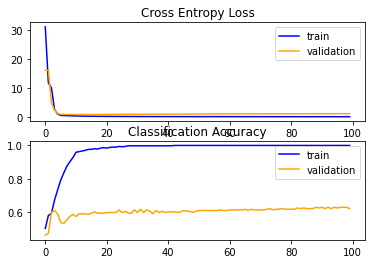

In [19]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [20]:
predictions=model.predict(X_test)

In [21]:
predictions

array([[9.54498708e-01, 4.55013327e-02],
       [2.42366530e-02, 9.75763321e-01],
       [2.25167461e-02, 9.77483273e-01],
       [5.69761992e-01, 4.30238008e-01],
       [5.13242543e-01, 4.86757427e-01],
       [8.65521133e-02, 9.13447917e-01],
       [1.58301368e-01, 8.41698587e-01],
       [9.97403681e-01, 2.59634038e-03],
       [7.16521263e-01, 2.83478707e-01],
       [5.65132558e-01, 4.34867471e-01],
       [9.19606388e-01, 8.03936720e-02],
       [3.99006367e-01, 6.00993633e-01],
       [8.62856686e-01, 1.37143299e-01],
       [9.89026845e-01, 1.09732207e-02],
       [2.16953326e-02, 9.78304625e-01],
       [2.50403792e-01, 7.49596179e-01],
       [9.96621251e-01, 3.37875239e-03],
       [3.37097019e-01, 6.62903011e-01],
       [2.65745640e-01, 7.34254360e-01],
       [1.02957696e-01, 8.97042334e-01],
       [4.34517711e-01, 5.65482318e-01],
       [1.95957810e-01, 8.04042161e-01],
       [8.56101930e-01, 1.43898115e-01],
       [5.74140158e-03, 9.94258642e-01],
       [1.473619

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [22]:
from sklearn.metrics import classification_report


In [23]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [24]:
ytest=np.argmax(y_test, axis=1)

In [25]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [26]:
y_pred=np.argmax(predictions, axis=1)

In [27]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       118
           1       0.64      0.66      0.65       137

    accuracy                           0.62       255
   macro avg       0.61      0.61      0.61       255
weighted avg       0.61      0.62      0.62       255



Using increased number of filters does not increase performance.

### Using different pooling sizes

In [31]:
model = Sequential()

Using 4x4 filter

In [32]:
model.add(Conv2D(32, (4, 4), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 1)))

In [33]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [34]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [35]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [36]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 197, 197, 32)      544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 307328)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 614658    
Total params: 615,202
Trainable params: 615,202
Non-trainable params: 0
_________________________________________________________________


In [38]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 3s 210ms/step - loss: 11.7423 - accuracy: 0.5176 - precision_1: 0.5176 - recall_1: 0.5176 - val_loss: 14.4960 - val_accuracy: 0.4627 - val_precision_1: 0.4627 - val_recall_1: 0.4627
Epoch 2/100
8/8 [==============================] - 1s 93ms/step - loss: 7.1469 - accuracy: 0.5529 - precision_1: 0.5529 - recall_1: 0.5529 - val_loss: 3.7152 - val_accuracy: 0.5608 - val_precision_1: 0.5608 - val_recall_1: 0.5608
Epoch 3/100
8/8 [==============================] - 1s 95ms/step - loss: 1.5344 - accuracy: 0.6373 - precision_1: 0.6373 - recall_1: 0.6373 - val_loss: 1.2452 - val_accuracy: 0.5608 - val_precision_1: 0.5608 - val_recall_1: 0.5608
Epoch 4/100
8/8 [==============================] - 1s 92ms/step - loss: 0.7444 - accuracy: 0.6431 - precision_1: 0.6431 - recall_1: 0.6431 - val_loss: 0.7106 - val_accuracy: 0.5059 - val_precision_1: 0.5059 - val_recall_1: 0.5059
Epoch 5/100
8/8 [==============================] - 1s 92ms/step - loss: 0.559

Results clearly show the model has overfit the training data.

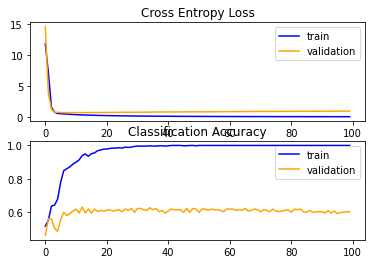

In [39]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [40]:
predictions=model.predict(X_test)

In [41]:
predictions

array([[0.9557527 , 0.04424728],
       [0.51766247, 0.48233753],
       [0.109661  , 0.89033896],
       [0.9207957 , 0.07920433],
       [0.7328938 , 0.2671062 ],
       [0.0665215 , 0.9334785 ],
       [0.19449012, 0.80550987],
       [0.9687307 , 0.03126932],
       [0.5298995 , 0.47010052],
       [0.56074303, 0.439257  ],
       [0.92919594, 0.07080402],
       [0.735574  , 0.26442596],
       [0.86720484, 0.1327951 ],
       [0.9925132 , 0.00748689],
       [0.01865575, 0.9813442 ],
       [0.48516896, 0.514831  ],
       [0.9606355 , 0.03936452],
       [0.05672469, 0.94327533],
       [0.19623059, 0.8037694 ],
       [0.12293484, 0.8770651 ],
       [0.3511422 , 0.64885783],
       [0.33737582, 0.6626242 ],
       [0.6920402 , 0.30795985],
       [0.00515383, 0.9948462 ],
       [0.19847926, 0.80152076],
       [0.7700711 , 0.22992891],
       [0.84777147, 0.15222853],
       [0.07045148, 0.9295485 ],
       [0.40780127, 0.5921988 ],
       [0.16394791, 0.83605206],
       [0.

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [42]:
from sklearn.metrics import classification_report


In [43]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [44]:
ytest=np.argmax(y_test, axis=1)

In [45]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [46]:
y_pred=np.argmax(predictions, axis=1)

In [47]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       118
           1       0.66      0.64      0.65       137

    accuracy                           0.63       255
   macro avg       0.63      0.63      0.63       255
weighted avg       0.63      0.63      0.63       255



Repeating above process for 5x5 filter

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 1)))

In [50]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [51]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [52]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [53]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 307328)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 614658    
Total params: 615,490
Trainable params: 615,490
Non-trainable params: 0
_________________________________________________________________


In [55]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 3s 223ms/step - loss: 14.8406 - accuracy: 0.5471 - precision_2: 0.5471 - recall_2: 0.5471 - val_loss: 7.0941 - val_accuracy: 0.4706 - val_precision_2: 0.4706 - val_recall_2: 0.4706
Epoch 2/100
8/8 [==============================] - 1s 91ms/step - loss: 5.6569 - accuracy: 0.5333 - precision_2: 0.5333 - recall_2: 0.5333 - val_loss: 3.8954 - val_accuracy: 0.5725 - val_precision_2: 0.5725 - val_recall_2: 0.5725
Epoch 3/100
8/8 [==============================] - 1s 91ms/step - loss: 1.2484 - accuracy: 0.5804 - precision_2: 0.5804 - recall_2: 0.5804 - val_loss: 0.7997 - val_accuracy: 0.4353 - val_precision_2: 0.4353 - val_recall_2: 0.4353
Epoch 4/100
8/8 [==============================] - 1s 91ms/step - loss: 0.6633 - accuracy: 0.5902 - precision_2: 0.5902 - recall_2: 0.5902 - val_loss: 0.7147 - val_accuracy: 0.4471 - val_precision_2: 0.4471 - val_recall_2: 0.4471
Epoch 5/100
8/8 [==============================] - 1s 88ms/step - loss: 0.6138

Results clearly show the model has overfit the training data.

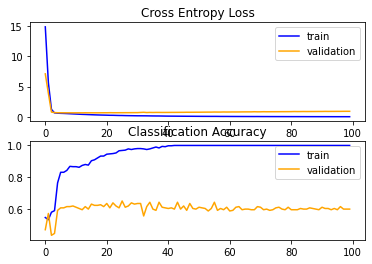

In [56]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [57]:
predictions=model.predict(X_test)

In [58]:
predictions

array([[0.96401125, 0.03598875],
       [0.49567285, 0.5043272 ],
       [0.13250054, 0.8674995 ],
       [0.9400431 , 0.05995692],
       [0.6660547 , 0.3339453 ],
       [0.04123751, 0.95876247],
       [0.08595817, 0.9140418 ],
       [0.984335  , 0.01566507],
       [0.5368105 , 0.46318948],
       [0.85923535, 0.14076462],
       [0.92089736, 0.07910267],
       [0.75824875, 0.24175127],
       [0.491256  , 0.50874394],
       [0.9737718 , 0.02622821],
       [0.01809517, 0.9819048 ],
       [0.33482954, 0.66517043],
       [0.94247997, 0.05752   ],
       [0.28559375, 0.71440625],
       [0.03719676, 0.96280324],
       [0.04846654, 0.9515335 ],
       [0.19792274, 0.8020773 ],
       [0.18839559, 0.81160444],
       [0.6962069 , 0.30379304],
       [0.00226051, 0.99773955],
       [0.15101671, 0.8489833 ],
       [0.65439916, 0.34560084],
       [0.8089154 , 0.1910846 ],
       [0.09194122, 0.90805876],
       [0.1317637 , 0.86823624],
       [0.05071393, 0.94928604],
       [0.

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [59]:
from sklearn.metrics import classification_report


In [60]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [61]:
ytest=np.argmax(y_test, axis=1)

In [62]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [63]:
y_pred=np.argmax(predictions, axis=1)

In [64]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57       118
           1       0.63      0.66      0.64       137

    accuracy                           0.61       255
   macro avg       0.60      0.60      0.60       255
weighted avg       0.61      0.61      0.61       255



Changing filter size has not increased performance.

### Using leaky relu as activation function

In [66]:
model = Sequential()

Using leaky relu

In [67]:
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 1)))

In [68]:
from tensorflow.keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))

In [69]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [70]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [71]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [72]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 313632)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 627266    
Total params: 627,586
Trainable params: 627,586
Non-trainable params: 0
_________________________________________________________________


In [74]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 3s 205ms/step - loss: 14.0964 - accuracy: 0.4373 - precision_3: 0.4373 - recall_3: 0.4373 - val_loss: 19.9161 - val_accuracy: 0.5373 - val_precision_3: 0.5373 - val_recall_3: 0.5373
Epoch 2/100
8/8 [==============================] - 1s 97ms/step - loss: 9.9358 - accuracy: 0.5235 - precision_3: 0.5235 - recall_3: 0.5235 - val_loss: 6.1887 - val_accuracy: 0.4627 - val_precision_3: 0.4627 - val_recall_3: 0.4627
Epoch 3/100
8/8 [==============================] - 1s 97ms/step - loss: 2.8279 - accuracy: 0.5941 - precision_3: 0.5941 - recall_3: 0.5941 - val_loss: 2.4314 - val_accuracy: 0.4745 - val_precision_3: 0.4745 - val_recall_3: 0.4745
Epoch 4/100
8/8 [==============================] - 1s 93ms/step - loss: 1.1221 - accuracy: 0.5882 - precision_3: 0.5882 - recall_3: 0.5882 - val_loss: 0.8699 - val_accuracy: 0.5647 - val_precision_3: 0.5647 - val_recall_3: 0.5647
Epoch 5/100
8/8 [==============================] - 1s 98ms/step - loss: 0.691

Results clearly show the model has overfit the training data.

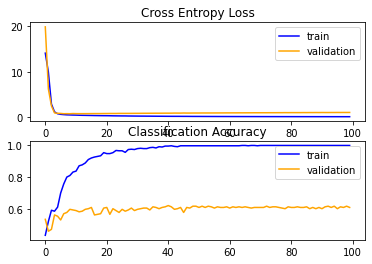

In [75]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [76]:
predictions=model.predict(X_test)

In [77]:
predictions

array([[9.65825498e-01, 3.41744609e-02],
       [2.62947083e-01, 7.37052858e-01],
       [3.11094932e-02, 9.68890429e-01],
       [8.50600779e-01, 1.49399176e-01],
       [6.82535112e-01, 3.17464828e-01],
       [7.30849281e-02, 9.26915050e-01],
       [2.14010075e-01, 7.85989940e-01],
       [9.86636460e-01, 1.33635076e-02],
       [7.27156103e-01, 2.72843927e-01],
       [5.91808498e-01, 4.08191502e-01],
       [9.43688214e-01, 5.63118160e-02],
       [5.06670356e-01, 4.93329614e-01],
       [8.15968096e-01, 1.84031889e-01],
       [9.92371202e-01, 7.62881944e-03],
       [2.63950173e-02, 9.73604977e-01],
       [3.03648710e-01, 6.96351290e-01],
       [9.95994687e-01, 4.00532316e-03],
       [3.13130140e-01, 6.86869860e-01],
       [2.75925070e-01, 7.24074960e-01],
       [1.02292754e-01, 8.97707224e-01],
       [4.16350096e-01, 5.83649874e-01],
       [2.57723957e-01, 7.42276013e-01],
       [7.67878711e-01, 2.32121333e-01],
       [4.67066607e-03, 9.95329380e-01],
       [3.281241

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [78]:
from sklearn.metrics import classification_report


In [79]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [80]:
ytest=np.argmax(y_test, axis=1)

In [81]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [82]:
y_pred=np.argmax(predictions, axis=1)

In [83]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       118
           1       0.68      0.65      0.66       137

    accuracy                           0.65       255
   macro avg       0.65      0.65      0.65       255
weighted avg       0.65      0.65      0.65       255



No significant affect on performance due to leaky relu activation function.

### Changing stride from 1 to 2

In [84]:
model = Sequential()

In [85]:
model.add(Conv2D(32, (3, 3),strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 1)))

In [86]:
model.add(MaxPooling2D((2, 2)))

Flattening the layers and then creating fully connected layer.

In [87]:
model.add(Flatten())


The output layer has 2 output neurons for the 2 classes. Softmax function has been used to output probability of each class.

In [88]:
model.add(Dense(2, activation='softmax'))


Using gradient descent with learning rate 0.001 and momentum=0.9. The momentum will help is avoiding local minima 

In [89]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [90]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 99, 99, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 153666    
Total params: 153,986
Trainable params: 153,986
Non-trainable params: 0
_________________________________________________________________


In [91]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 2s 121ms/step - loss: 4.6732 - accuracy: 0.5235 - precision_4: 0.5235 - recall_4: 0.5235 - val_loss: 6.1883 - val_accuracy: 0.5373 - val_precision_4: 0.5373 - val_recall_4: 0.5373
Epoch 2/100
8/8 [==============================] - 0s 38ms/step - loss: 3.9101 - accuracy: 0.5255 - precision_4: 0.5255 - recall_4: 0.5255 - val_loss: 6.9768 - val_accuracy: 0.5412 - val_precision_4: 0.5412 - val_recall_4: 0.5412
Epoch 3/100
8/8 [==============================] - 0s 38ms/step - loss: 3.2520 - accuracy: 0.5922 - precision_4: 0.5922 - recall_4: 0.5922 - val_loss: 1.6257 - val_accuracy: 0.6078 - val_precision_4: 0.6078 - val_recall_4: 0.6078
Epoch 4/100
8/8 [==============================] - 0s 34ms/step - loss: 2.6577 - accuracy: 0.6020 - precision_4: 0.6020 - recall_4: 0.6020 - val_loss: 1.6215 - val_accuracy: 0.5725 - val_precision_4: 0.5725 - val_recall_4: 0.5725
Epoch 5/100
8/8 [==============================] - 0s 36ms/step - loss: 1.6915 

Results clearly show the model has overfit the training data.

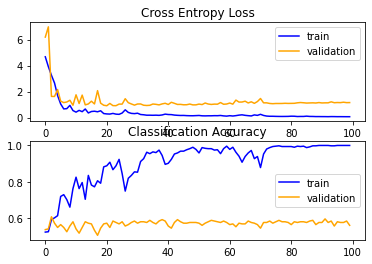

In [92]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()

In [93]:
predictions=model.predict(X_test)

In [94]:
predictions

array([[4.80903715e-01, 5.19096255e-01],
       [4.56598252e-02, 9.54340160e-01],
       [3.34054418e-02, 9.66594517e-01],
       [4.69216704e-01, 5.30783236e-01],
       [6.75337613e-01, 3.24662387e-01],
       [4.05661315e-02, 9.59433913e-01],
       [2.11352017e-02, 9.78864789e-01],
       [9.46154773e-01, 5.38452230e-02],
       [9.53873634e-01, 4.61264029e-02],
       [5.76786399e-01, 4.23213631e-01],
       [9.94953573e-01, 5.04638860e-03],
       [3.34552787e-02, 9.66544747e-01],
       [9.80196953e-01, 1.98029969e-02],
       [9.73114371e-01, 2.68856585e-02],
       [6.13959767e-02, 9.38603997e-01],
       [7.82072544e-01, 2.17927441e-01],
       [9.95020032e-01, 4.97992989e-03],
       [1.20163208e-03, 9.98798370e-01],
       [3.17968638e-03, 9.96820331e-01],
       [4.21199538e-02, 9.57880080e-01],
       [1.24495968e-01, 8.75504076e-01],
       [3.29105884e-01, 6.70894146e-01],
       [4.45412427e-01, 5.54587603e-01],
       [5.66063588e-03, 9.94339406e-01],
       [2.514572

Since softmax function has been used at output layer, the model generates probabilities for individual classes.

In [95]:
from sklearn.metrics import classification_report


In [96]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In order to convert probabilities into class labels, np.argmax has been used.

In [97]:
ytest=np.argmax(y_test, axis=1)

In [98]:
ytest

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [99]:
y_pred=np.argmax(predictions, axis=1)

In [100]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52       118
           1       0.60      0.67      0.63       137

    accuracy                           0.58       255
   macro avg       0.58      0.58      0.58       255
weighted avg       0.58      0.58      0.58       255



Increasing stride from 1 to 2 has decreased performance signifianctly.